In [89]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import netCDF4 as nc4            # to work with netCDFs

# Configs

In [90]:
start_date = '2015-08-04'
end_date = '2018-06-03'
ws='Coweeta'
data_dir  = r"g:\Shared drives\Ryoko and Hilary\SMSigxModel\analysis\0_data_preprocessing\raw_data\Coweeta\CHOSEN" #os.getcwd()
output_dir = r"G:\Shared drives\Ryoko and Hilary\SMSigxModel\analysis\data\Coweeta"

# Read CHOSEN data

## Inspect attributes

In [91]:
ncdf = nc4.Dataset(os.path.join(data_dir, f"{ws}_NetCDF.nc"), 'r')

In [92]:
for v in ncdf.variables:
    print(ncdf.variables[v])

<class 'netCDF4._netCDF4.Variable'>
float64 Datetime(Dim_Datetime)
    range: ['2000-02-26', '2018-10-31']
unlimited dimensions: 
current shape = (6823,)
filling off
<class 'netCDF4._netCDF4.Variable'>
vlen Grid(Dim_Grid)
    Latitude: ['39.15', '', '33.89655', '35.04826', '35.11535', '35.32116', '35.18539', '35.067189', '35.0734', '35.181048', '35.24270', '35.22737', '35.16331', '35.14298', '35.824828', '', '35.069427', '35.054105', '35.069255', '', '35.051459', '35.06131400', '35.067855', '35.056714', '35.068576', '35.0506480', '35.0593010', '35.065818', '35.058029', '35.065977', '35.0493880', '35.0578120', '', '35.667943', '35.667198', '35.666348']
    Longitude: ['-83.37972', '', '-83.362289', '-83.45428', '-83.46619', '-83.79736', '-83.62215', '-83.384413', '-83.16843', '-83.385019', '-83.33727', '-83.45130', '-83.36320', '-83.48930', '-82.555420', '', '-83.437335', '-83.423798', '-83.440717', '', '-83.462251', '-83.47058383', '-83.436667', '-83.426877', '-83.440269', '-83.4606291

In [93]:
start_time = pd.to_datetime(ncdf.variables['Datetime'][:][0])
end_time = pd.to_datetime(ncdf.variables['Datetime'][:][-1])
time_index = pd.date_range(start_time, end_time, freq='D')
time_index
len(time_index)

6823

In [94]:
ncdf.variables["Grid"][:]

array(['Prentiss', 'Coweeta', 'Whitehall', 'CoweetaMid',
       'LowerJonesCreek', 'GrahamCounty', 'WineSpring', 'TessenteeFarm',
       'Cullasaja', 'FranklinCentral', 'FranklinNE', 'FranklinNW',
       'FranklinSE', 'FranklinSW', 'MHOpen', '1039', 'CWT102', 'CWT105',
       'CWT107', 'CWT227', 'CWT132', 'CWT136', 'CWT202', 'CWT205',
       'CWT207', 'CWT232', 'CWT236', 'CWT302', 'CWT305', 'CWT307',
       'CWT332', 'CWT336', 'CWT418', 'BentCreek1', 'BentCreek2',
       'BentCreek3'], dtype=object)

## Define functions

In [95]:
def print_ncdf_info(ncdf, variablename):
    print(ncdf.variables[variablename])

In [96]:
def plot_all_stations(ncdf, variablename):
    ncdf_var = ncdf.variables[variablename]
    name_list = ncdf_var.getncattr('names')
    unit = ncdf_var.getncattr('units')

    # Creating a plot
    plt.figure(figsize=(15, 4))

    # Iterating through each column in the data
    for i in range(ncdf_var.shape[1]):
        # Plotting the data of each column
        plt.plot(ncdf_var[:, i], label=name_list[i], alpha=.5)

    # Adding labels and title
    plt.xlabel("timestep")
    plt.ylabel(unit)
    plt.title(variablename)

    # Adding legend to differentiate the columns
    plt.legend()

    # Displaying the plot
    plt.show()

In [97]:
def get_specific_station_data(ncdf, variablename, station_name):
    ncdf_var = ncdf.variables[variablename]
    name_list = ncdf_var.getncattr('names')
    unit = ncdf_var.getncattr('units')
    # Find the index of "CoweetaMid_Precipitation" within the names_list
    index = name_list.index(f'{station_name}_{variablename}')

    # Get the data for "CoweetaMid_Precipitation"
    data = ncdf_var[:, index]
    plt.figure(figsize=(5, 3))
    plt.plot(data)
    plt.ylabel(unit)
    plt.title(variablename)

    return data

## Read precip data
Get the data from CoweetaMid station (4101) because that's the only station within the basin

<class 'netCDF4._netCDF4.Variable'>
float64 Precipitation(Dim_Datetime, Dim_Precipitation_Grid)
    names: ['Whitehall_Precipitation', 'CoweetaMid_Precipitation', 'LowerJonesCreek_Precipitation', 'GrahamCounty_Precipitation', 'WineSpring_Precipitation', 'TessenteeFarm_Precipitation', 'Cullasaja_Precipitation', 'FranklinCentral_Precipitation', 'FranklinNE_Precipitation', 'FranklinNW_Precipitation', 'FranklinSE_Precipitation', 'FranklinSW_Precipitation', 'MHOpen_Precipitation']
    time: ['2013-04-09', '2018-10-31']
    units: mm/d
    data_source_link: ['http://coweeta.uga.edu/dbpublic/dataset_details.asp?accession=4102 (Central, NE, NW, SE, SW)', 'http://coweeta.uga.edu/dbpublic/dataset_details.asp?accession=4104 (4104)', 'http://coweeta.uga.edu/dbpublic/dataset_details.asp?accession=4106 (4106)', 'http://coweeta.uga.edu/dbpublic/dataset_details.asp?accession=4107 (4107)', 'http://coweeta.uga.edu/dbpublic/dataset_details.asp?accession=4103 (4103)', 'http://coweeta.uga.edu/dbpublic/data

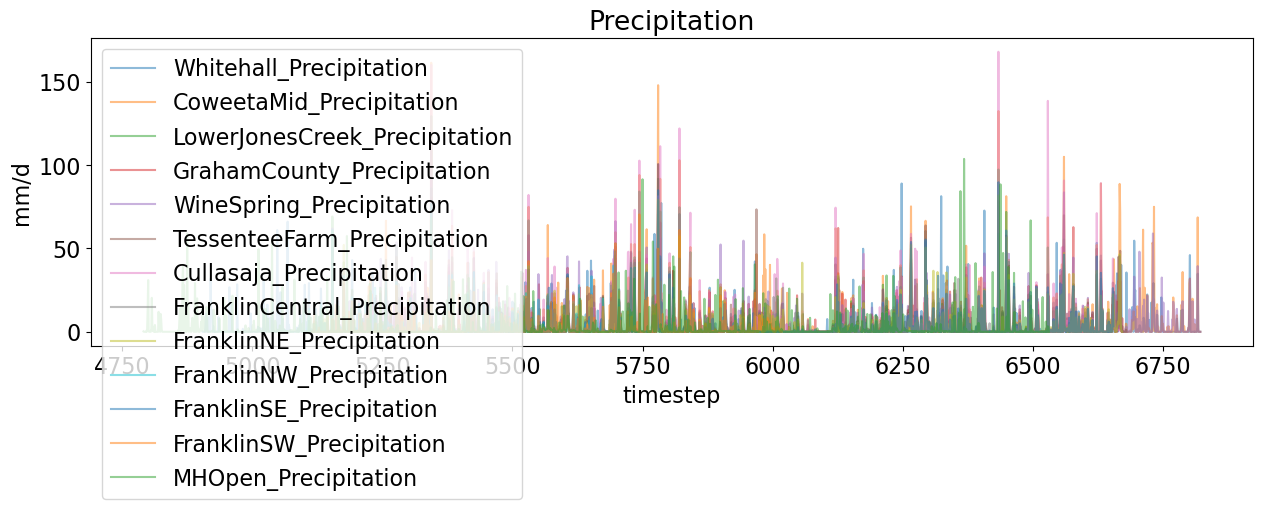

In [98]:
print_ncdf_info(ncdf, 'Precipitation')
plot_all_stations(ncdf, 'Precipitation')

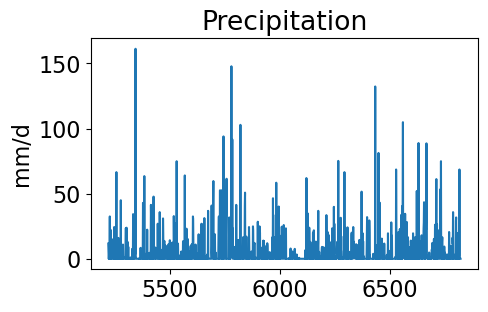

In [99]:
p = get_specific_station_data(ncdf, 'Precipitation', 'CoweetaMid')

## Read PET related data

### Solar Radiation
All of the statations are outside of Coweeta basin. Select the closest one to the coweeta basin & data available (Franklin Central)

<class 'netCDF4._netCDF4.Variable'>
float64 SolarRadiation(Dim_Datetime, Dim_SolarRadiation_Grid)
    names: ['FranklinCentral_SolarRadiation', 'FranklinNE_SolarRadiation', 'FranklinNW_SolarRadiation', 'FranklinSW_SolarRadiation']
    time: ['2014-02-17', '2018-06-03']
    units: W/m2
    data_source_link: http://coweeta.uga.edu/dbpublic/dataset_details.asp?accession=1039 (1039)
unlimited dimensions: 
current shape = (6823, 4)
filling off


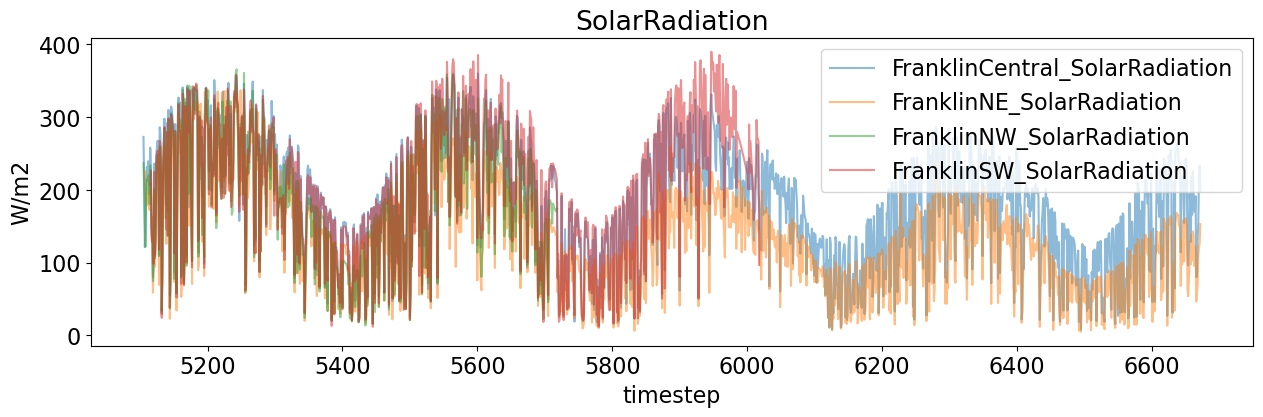

In [100]:
print_ncdf_info(ncdf, 'SolarRadiation')
plot_all_stations(ncdf, 'SolarRadiation')

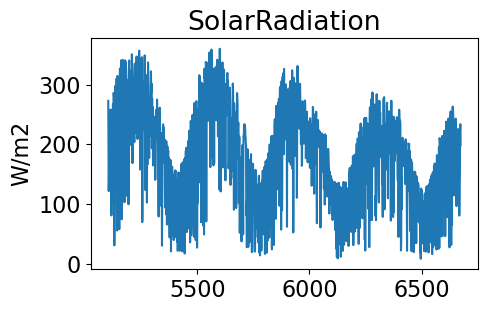

In [101]:
R_s = get_specific_station_data(ncdf, 'SolarRadiation', 'FranklinCentral')

### Relative humidity (RH)
Choose the Coweeta_Mid station

<class 'netCDF4._netCDF4.Variable'>
float64 RelativeHumidity(Dim_Datetime, Dim_RelativeHumidity_Grid)
    names: ['Whitehall_RelativeHumidity', 'CoweetaMid_RelativeHumidity', 'LowerJonesCreek_RelativeHumidity', 'GrahamCounty_RelativeHumidity', 'WineSpring_RelativeHumidity', 'TessenteeFarm_RelativeHumidity', 'Cullasaja_RelativeHumidity', 'FranklinCentral_RelativeHumidity', 'FranklinNE_RelativeHumidity', 'FranklinNW_RelativeHumidity', 'FranklinSE_RelativeHumidity', 'FranklinSW_RelativeHumidity', 'MHOpen_RelativeHumidity']
    time: ['2004-11-02', '2018-10-31']
    units: %
    data_source_link: ['http://coweeta.uga.edu/dbpublic/dataset_details.asp?accession=4102 (Central, NE, NW, SE, SW)', 'http://coweeta.uga.edu/dbpublic/dataset_details.asp?accession=4104 (4104)', 'http://coweeta.uga.edu/dbpublic/dataset_details.asp?accession=4106 (4106)', 'http://coweeta.uga.edu/dbpublic/dataset_details.asp?accession=4107 (4107)', 'http://coweeta.uga.edu/dbpublic/dataset_details.asp?accession=4103 (410

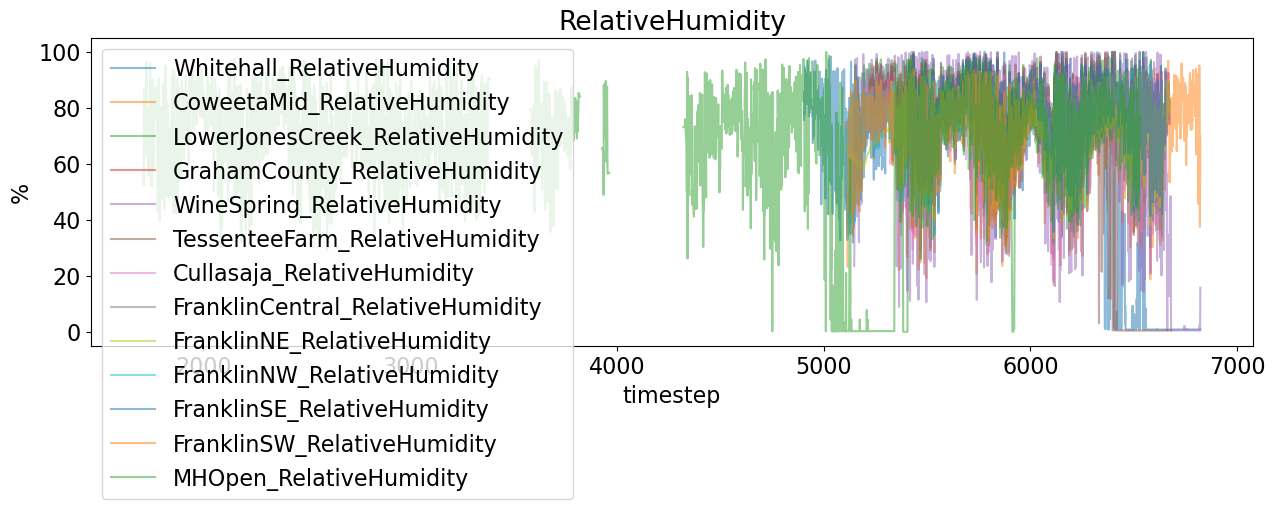

In [102]:
print_ncdf_info(ncdf, 'RelativeHumidity')
plot_all_stations(ncdf, 'RelativeHumidity')

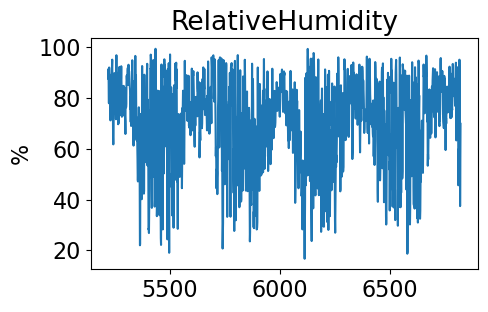

In [103]:
RH = get_specific_station_data(ncdf, 'RelativeHumidity', 'CoweetaMid')

### Wind speed

<class 'netCDF4._netCDF4.Variable'>
float64 WindSpeed(Dim_Datetime, Dim_WindSpeed_Grid)
    names: ['Whitehall_WindSpeed', 'CoweetaMid_WindSpeed', 'LowerJonesCreek_WindSpeed', 'GrahamCounty_WindSpeed', 'WineSpring_WindSpeed', 'TessenteeFarm_WindSpeed', 'Cullasaja_WindSpeed', 'FranklinCentral_WindSpeed', 'FranklinNE_WindSpeed', 'FranklinNW_WindSpeed', 'FranklinSE_WindSpeed', 'FranklinSW_WindSpeed', 'MHOpen_WindSpeed']
    time: ['2013-04-09', '2018-10-31']
    units: m/s
    data_source_link: ['http://coweeta.uga.edu/dbpublic/dataset_details.asp?accession=4102 (Central, NE, NW, SE, SW)', 'http://coweeta.uga.edu/dbpublic/dataset_details.asp?accession=4104 (4104)', 'http://coweeta.uga.edu/dbpublic/dataset_details.asp?accession=4106 (4106)', 'http://coweeta.uga.edu/dbpublic/dataset_details.asp?accession=4107 (4107)', 'http://coweeta.uga.edu/dbpublic/dataset_details.asp?accession=4103 (4103)', 'http://coweeta.uga.edu/dbpublic/dataset_details.asp?accession=4038 (OpenSite)', 'http://coweeta.u

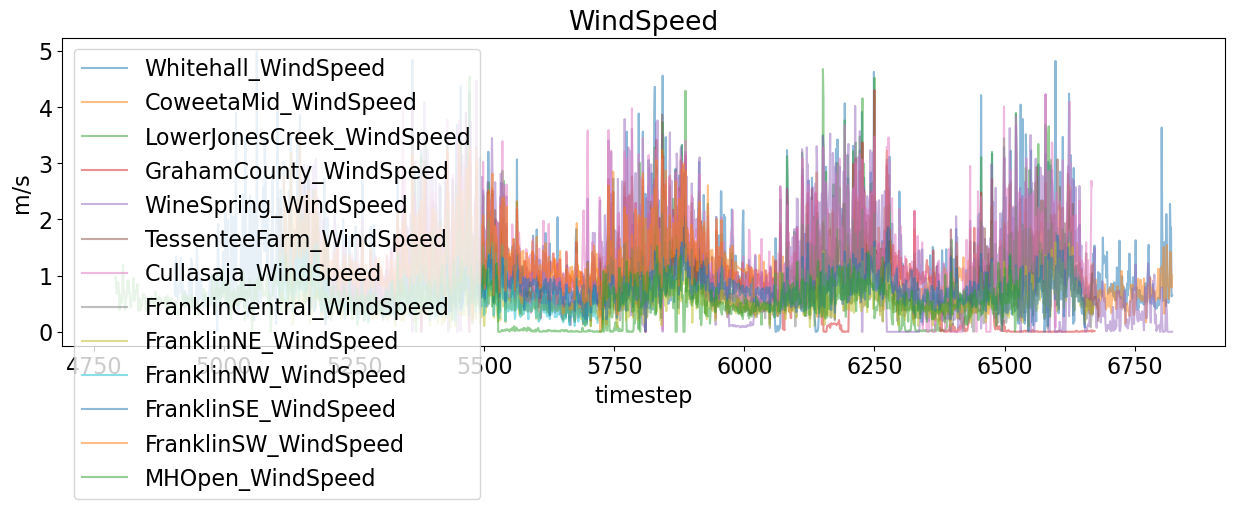

In [104]:
print_ncdf_info(ncdf, 'WindSpeed')
plot_all_stations(ncdf, 'WindSpeed')

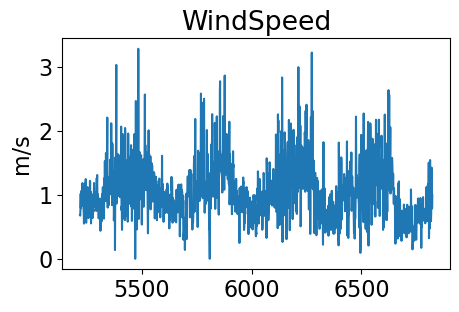

In [105]:
U_z = get_specific_station_data(ncdf, 'WindSpeed', 'CoweetaMid')

### Vapor pressure

<class 'netCDF4._netCDF4.Variable'>
float64 VaporPressure(Dim_Datetime, Dim_VaporPressure_Grid)
    names: 1039_VaporPressure
    time: ['2000-02-26', '2008-01-01']
    units: kPa
    data_source_link: http://coweeta.uga.edu/dbpublic/dataset_details.asp?accession=1039 (1039)
unlimited dimensions: 
current shape = (6823, 1)
filling off


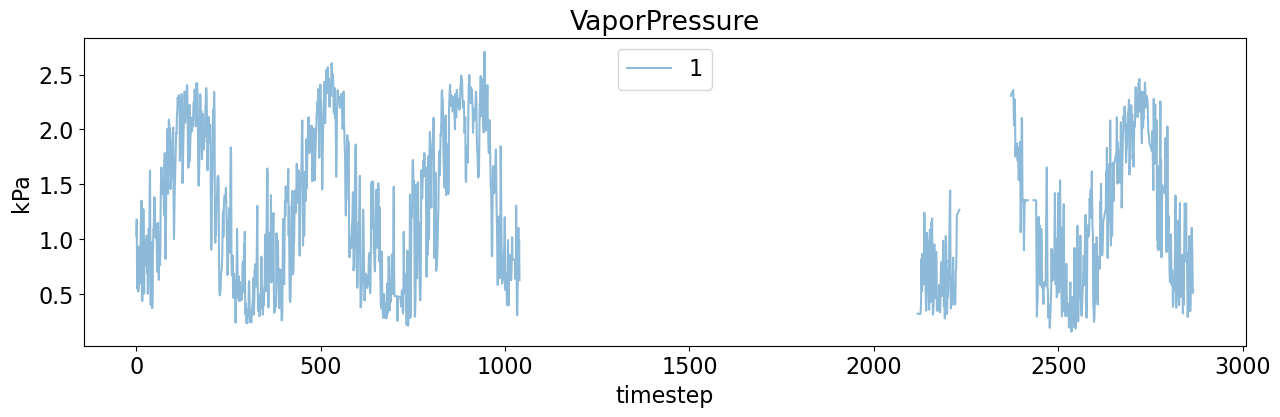

In [106]:
print_ncdf_info(ncdf, 'VaporPressure')
plot_all_stations(ncdf, 'VaporPressure')

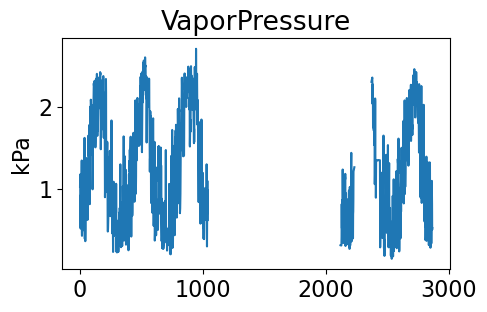

In [107]:
e_a = get_specific_station_data(ncdf, 'VaporPressure', '1039')

### Temperature

<class 'netCDF4._netCDF4.Variable'>
float64 AirTemperature(Dim_Datetime, Dim_AirTemperature_Grid)
    names: ['Whitehall_AirTemperature', 'CoweetaMid_AirTemperature', 'LowerJonesCreek_AirTemperature', 'GrahamCounty_AirTemperature', 'WineSpring_AirTemperature', 'TessenteeFarm_AirTemperature', 'Cullasaja_AirTemperature', 'FranklinCentral_AirTemperature', 'FranklinNE_AirTemperature', 'FranklinNW_AirTemperature', 'FranklinSE_AirTemperature', 'FranklinSW_AirTemperature', 'MHOpen_AirTemperature']
    time: ['2004-11-02', '2018-10-31']
    units: Degree celsius
    data_source_link: ['http://coweeta.uga.edu/dbpublic/dataset_details.asp?accession=4102 (Central, NE, NW, SE, SW)', 'http://coweeta.uga.edu/dbpublic/dataset_details.asp?accession=4104 (4104)', 'http://coweeta.uga.edu/dbpublic/dataset_details.asp?accession=4106 (4106)', 'http://coweeta.uga.edu/dbpublic/dataset_details.asp?accession=4107 (4107)', 'http://coweeta.uga.edu/dbpublic/dataset_details.asp?accession=4103 (4103)', 'http://cowe

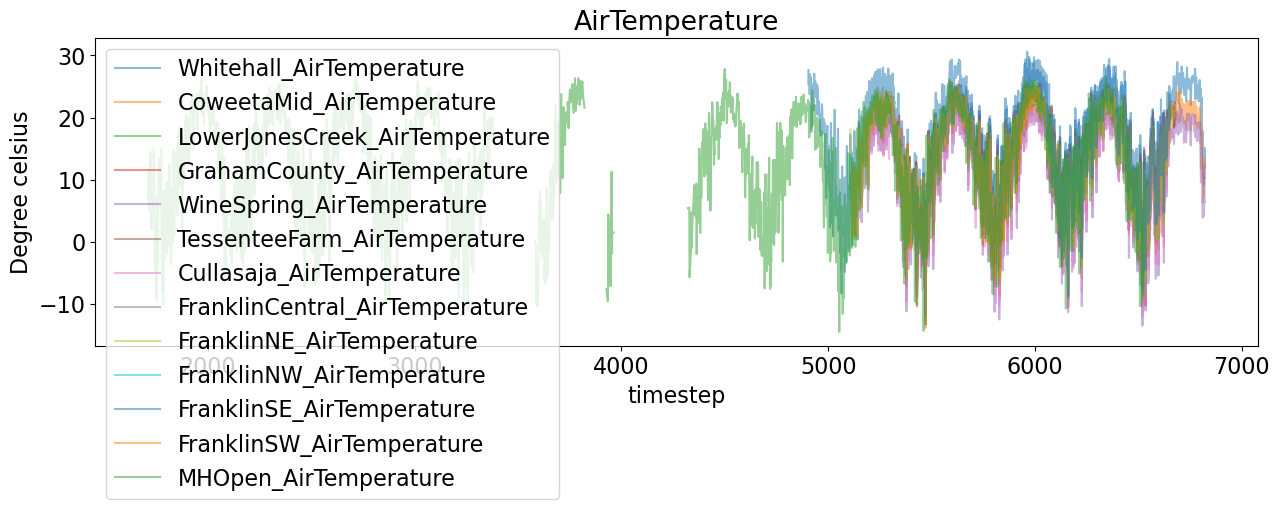

In [108]:
print_ncdf_info(ncdf, 'AirTemperature')
plot_all_stations(ncdf, 'AirTemperature')

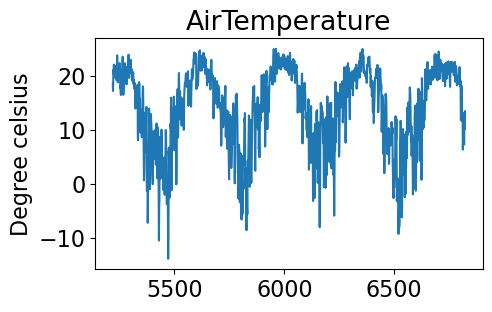

In [109]:
tair = get_specific_station_data(ncdf, 'AirTemperature', 'CoweetaMid')

# Calculate PET

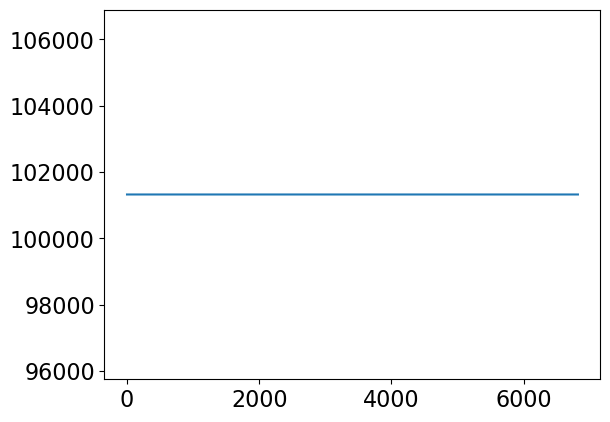

In [110]:
pressure = np.full_like(p, 101325) #Pa
plt.plot(pressure)

In [111]:
pressure
"""

To find the pressure at a specific elevation, you can use the barometric formula if you're considering the atmosphere to be standard. However, for a quick estimate, you can use the following empirical formula:

P=P0×(1−L×hT0)g×MR×LP=P0​×(1−T0​L×h​)R×Lg×M​

Where:

    PP is the pressure at elevation hh
    P0=101325 PaP0​=101325Pa is the standard pressure at sea level
    L=0.0065 K/mL=0.0065K/m is the standard temperature lapse rate
    h=782 mh=782m is the elevation
    T0=288.15 KT0​=288.15K is the standard temperature at sea level
    g=9.80665 m/s2g=9.80665m/s2 is the standard gravity
    M=0.0289644 kg/molM=0.0289644kg/mol is the molar mass of Earth's air
    R=8.31447 J/(mol K)R=8.31447J/(mol K) is the ideal gas constant

Substitute the known values into the equation:

P=101325×(1−0.0065×782288.15)9.80665×0.02896448.31447×0.0065P=101325×(1−288.150.0065×782​)8.31447×0.00659.80665×0.0289644​

Calculate the pressure PP:

P≈101325×(1−0.0176)5.255P≈101325×(1−0.0176)5.255

P≈101325×(0.9824)5.255P≈101325×(0.9824)5.255

P≈101325×0.8355P≈101325×0.8355

P≈84674.13 PaP≈84674.13Pa

So, the approximate pressure at an elevation of 782 meters is 84674.13 Pa84674.13Pa or 84.67 kPa84.67kPa.
"""

"\n\nTo find the pressure at a specific elevation, you can use the barometric formula if you're considering the atmosphere to be standard. However, for a quick estimate, you can use the following empirical formula:\n\nP=P0×(1−L×hT0)g×MR×LP=P0\u200b×(1−T0\u200bL×h\u200b)R×Lg×M\u200b\n\nWhere:\n\n    PP is the pressure at elevation hh\n    P0=101325\u2009PaP0\u200b=101325Pa is the standard pressure at sea level\n    L=0.0065\u2009K/mL=0.0065K/m is the standard temperature lapse rate\n    h=782\u2009mh=782m is the elevation\n    T0=288.15\u2009KT0\u200b=288.15K is the standard temperature at sea level\n    g=9.80665\u2009m/s2g=9.80665m/s2 is the standard gravity\n    M=0.0289644\u2009kg/molM=0.0289644kg/mol is the molar mass of Earth's air\n    R=8.31447\u2009J/(mol K)R=8.31447J/(mol K) is the ideal gas constant\n\nSubstitute the known values into the equation:\n\nP=101325×(1−0.0065×782288.15)9.80665×0.02896448.31447×0.0065P=101325×(1−288.150.0065×782\u200b)8.31447×0.00659.80665×0.0289644

## Unit conversion
Check https://eto.readthedocs.io/en/latest/package_references.html#parameter-estimation

In [112]:
# Pressure 
conversion_to_kilo = 0.001
pressure_kpa = pressure * conversion_to_kilo

# Radiation W/m2 -> MJ/m2
# 1 W/m2 = 0.0864 MJ/m2/day
conversion_Wm2_to_MJm2 = 0.0864 
R_s_MJm2 = R_s * conversion_Wm2_to_MJm2

# vapor pressure (kPa)
# no conversion

# Wind speed (m/s)
# no conversion

# Relative humidity (%) -> (-)
RH_fraction = RH / 100

# Check the period when the data is available

In [113]:
# Need df[["date", "R_s", "P", "T_mean", "e_a", "RH_mean", "U_z"]]
forcings = np.vstack([tair, R_s_MJm2, e_a, RH]).transpose()
forcings_df = pd.DataFrame(forcings, index=time_index, columns=["tmean", "rs", "e_a", "rh"])
forcings_df["date"] = pd.to_datetime(forcings_df.index)
forcings_df.head()

# elevation (m), lat, lon, alpha

,tmean,rs,e_a,rh,date
2000-02-26,NaN,NaN,1.030000,NaN,2000-02-26
2000-02-27,NaN,NaN,1.180417,NaN,2000-02-27
2000-02-28,NaN,NaN,0.607083,NaN,2000-02-28
2000-02-29,NaN,NaN,0.546667,NaN,2000-02-29
2000-03-01,NaN,NaN,0.813750,NaN,2000-03-01


<AxesSubplot:>

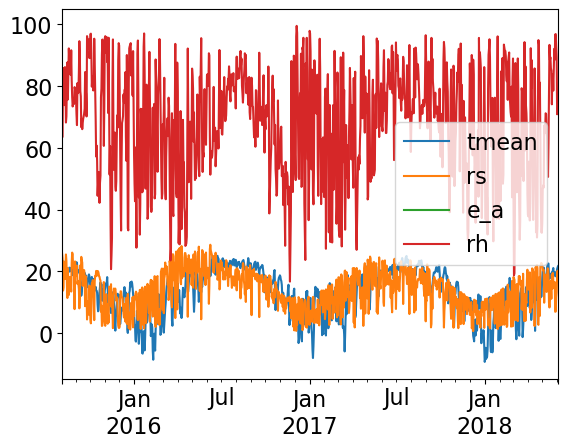

In [114]:
forcings_df[["tmean", "rs", "e_a", "rh"]][start_date:end_date].plot()

In [115]:
input_df = forcings_df[["tmean", "rs", "rh", "date"]][start_date:end_date].dropna().copy()
input_df.head()

,tmean,rs,rh,date
2015-08-04,23.298750,25.720985,63.355000,2015-08-04
2015-08-05,23.469583,24.302729,63.481250,2015-08-05
2015-08-06,20.384583,13.787222,85.501250,2015-08-06
2015-08-07,20.457083,14.847451,85.753750,2015-08-07
2015-08-08,21.703750,23.113750,78.720833,2015-08-08


## Calculate PET

In [116]:
import sys
sys.path.append(r'G:\Shared drives\Ryoko and Hilary\SMSigxModel\analysis\libs\cfe_py')
import pyet
pet = pyet.priestley_taylor(tmean=input_df.tmean, rs=input_df.rs, rh=input_df.rh, lat=35.05, elevation=726,alpha=1.57)
# pet = pyet.priestley_taylor(tmean=input_df.tmean, rs=input_df.rs, rh=input_df.rh, lat=35.05, elevation=726,alpha=1.16)
# alpha from Rao, L., G. Sun, C.R. Ford, and J. Vose, 2011. Modeling Potential Evapotranspiration of Two Forested Watersheds in the Southern Appalachians. Transactions of the ASABE 54:2067–2078.
# 
pet.head()

2015-08-04    9.209761
2015-08-05    8.716529
2015-08-06    4.664014
2015-08-07    5.039081
2015-08-08    8.074840
Freq: D, Name: Priestley_Taylor, dtype: float64

4323.924757325596

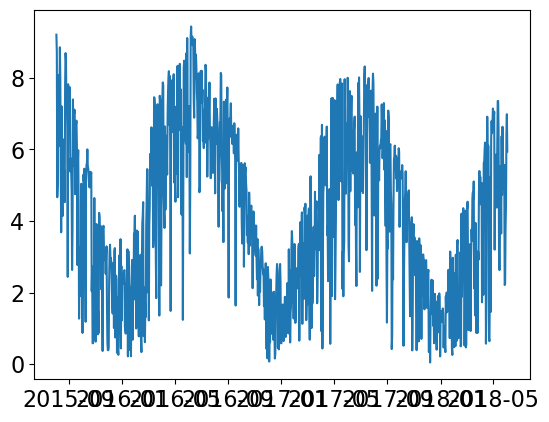

In [117]:
plt.plot(pet)

pet.sum()

In [118]:
_DailyPET = forcings_df.merge(pet, left_index= True, right_index=True, how='outer')

In [119]:
DailyPET = _DailyPET.resample('D').asfreq()
DailyPET.head()

,tmean,rs,e_a,rh,date,Priestley_Taylor
2000-02-26,NaN,NaN,1.030000,NaN,2000-02-26,NaN
2000-02-27,NaN,NaN,1.180417,NaN,2000-02-27,NaN
2000-02-28,NaN,NaN,0.607083,NaN,2000-02-28,NaN
2000-02-29,NaN,NaN,0.546667,NaN,2000-02-29,NaN
2000-03-01,NaN,NaN,0.813750,NaN,2000-03-01,NaN


# Read CHL Flow data
## Discharge data

<AxesSubplot:xlabel='time'>

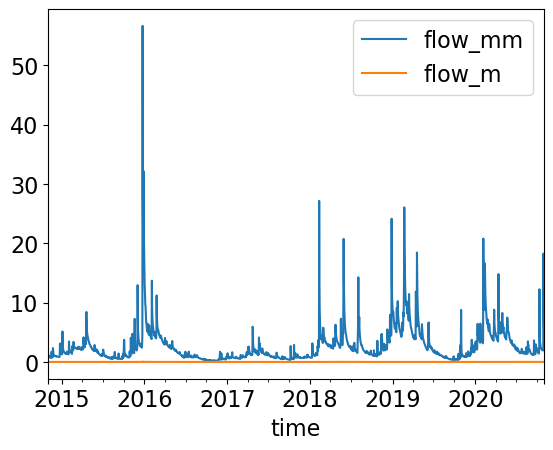

In [120]:
path = r"G:\Shared drives\Ryoko and Hilary\SMSigxModel\analysis\0_data_preprocessing\raw_data\Coweeta\temp\flow.csv"
q = pd.read_csv(path)
q['time'] = pd.to_datetime(q['time'])
q.set_index('time', inplace=True)
q.plot()

# Get soil moisture data

In [121]:
path = r"G:\Shared drives\Ryoko and Hilary\SMSigxModel\analysis\0_data_preprocessing\raw_data\Coweeta\temp\sm_basin_avg.csv"
df_sm = pd.read_csv(
        path,
        index_col="DateTime",
        parse_dates=["DateTime"],
    )
df_sm.index.name = 'Time'
df_sm["Soil Moisture Content"] = df_sm["avg"]/100 #percent -> vswc

# Finalize

## Unit conversion

In [122]:
m_to_mm = 1000
mm_to_m = 1/m_to_mm
km_to_m = 1000
m_to_km = 1/km_to_m

In [123]:
DailyPET.head()

,tmean,rs,e_a,rh,date,Priestley_Taylor
2000-02-26,NaN,NaN,1.030000,NaN,2000-02-26,NaN
2000-02-27,NaN,NaN,1.180417,NaN,2000-02-27,NaN
2000-02-28,NaN,NaN,0.607083,NaN,2000-02-28,NaN
2000-02-29,NaN,NaN,0.546667,NaN,2000-02-29,NaN
2000-03-01,NaN,NaN,0.813750,NaN,2000-03-01,NaN


In [124]:
_p_m = p * mm_to_m
q_m = q["flow_mm"] * mm_to_m
pet_m = DailyPET.Priestley_Taylor * mm_to_m

In [125]:
p_m = pd.DataFrame(_p_m, index=DailyPET.index)
p_m

,0
2000-02-26,NaN
2000-02-27,NaN
2000-02-28,NaN
2000-02-29,NaN
2000-03-01,NaN
...,...
2018-10-27,0.000254
2018-10-28,0.000000
2018-10-29,0.000000
2018-10-30,0.000000


## Concat all the data

In [126]:
output_forcing_df = pd.DataFrame()
output_forcing_df["PET"] = pet_m.copy()
output_forcing_df["precip_rate"] = p_m
output_forcing_df.rename_axis("time", inplace=True)
output_forcing_df


,PET,precip_rate
time,,
2000-02-26,NaN,NaN
2000-02-27,NaN,NaN
2000-02-28,NaN,NaN
2000-02-29,NaN,NaN
2000-03-01,NaN,NaN
...,...,...
2018-10-27,NaN,0.000254
2018-10-28,NaN,0.000000
2018-10-29,NaN,0.000000


In [127]:
area_km2 = 0.1210

In [128]:
_output_testdata = pd.DataFrame()
_output_testdata["Flow"] = q_m.copy().asfreq('D')
_output_testdata["Rainfall"] = p_m.copy()
_output_testdata["Soil Moisture Content"] = df_sm["Soil Moisture Content"]
_output_testdata["Direct Runoff"] = 0
_output_testdata["GIUH Runoff"] = 0
_output_testdata["Lateral Flow"] = 0
_output_testdata["Base Flow"] = 0
_output_testdata["Total Discharge"] = q_m.copy().asfreq('D') * (area_km2 * (km_to_m**2))
output_testdata = _output_testdata.copy()
output_testdata["Timestep"] = range(len(output_testdata))
output_testdata.rename_axis("Time", inplace=True)
output_testdata

,Flow,Rainfall,Soil Moisture Content,Direct Runoff,GIUH Runoff,Lateral Flow,Base Flow,Total Discharge,Timestep
Time,,,,,,,,,
2014-11-01,0.000860,0.0,NaN,0,0,0,0,104.013,0
2014-11-02,0.000964,0.0,NaN,0,0,0,0,116.586,1
2014-11-03,0.001077,0.0,NaN,0,0,0,0,130.302,2
2014-11-04,0.001067,0.0,NaN,0,0,0,0,129.159,3
2014-11-05,0.000992,0.0,NaN,0,0,0,0,120.015,4
...,...,...,...,...,...,...,...,...,...
2020-10-27,0.001908,NaN,NaN,0,0,0,0,230.886,2187
2020-10-28,0.002598,NaN,NaN,0,0,0,0,314.325,2188
2020-10-29,0.018250,NaN,NaN,0,0,0,0,2208.276,2189


## Save

In [129]:
file_path = os.path.join(output_dir, "forcing_daily_2014_2018_PT_157.csv")
output_forcing_df[start_date:end_date].to_csv(file_path)

In [130]:
output_testdata[start_date:end_date].to_csv(os.path.join(output_dir, "test_daily_2014_2018_sm_basinavg_PT_157.csv"))

In [131]:
print(len(output_forcing_df[start_date:end_date]))
output_forcing_df[start_date:end_date].head()

1035


,PET,precip_rate
time,,
2015-08-04,0.009210,0.000254
2015-08-05,0.008717,0.000000
2015-08-06,0.004664,0.005080
2015-08-07,0.005039,0.000762
2015-08-08,0.008075,0.000000


In [132]:
print(len(output_testdata[start_date:end_date]))
output_testdata[start_date:end_date].head()
output_testdata[start_date:end_date].tail()

1035


,Flow,Rainfall,Soil Moisture Content,Direct Runoff,GIUH Runoff,Lateral Flow,Base Flow,Total Discharge,Timestep
Time,,,,,,,,,
2018-05-30,0.020725,0.071886,0.366092,0,0,0,0,2507.742,1306
2018-05-31,0.013933,0.000762,0.339694,0,0,0,0,1685.925,1307
2018-06-01,0.010599,0.002540,0.325503,0,0,0,0,1282.446,1308
2018-06-02,0.008776,0.000000,0.314286,0,0,0,0,1061.847,1309
2018-06-03,0.007614,0.000254,0.304777,0,0,0,0,921.258,1310
